### Question 1: Identify the spam (90)

Following is a data with 3921 email. Each one has been identified as spam (1) or not (0). The research question is to use the other features in the data to predict whether an email is spam or not. The descriptions for each feature are listed in the data_description.txt file. When splitting the training and testing data, use 50%/50%. 

In [33]:
import pandas as pd

df = pd.read_csv("email.csv")
print(df.head())

   spam  to_multiple  from  cc  sent_email                 time  image  \
0     0            0     1   0           0  2012-01-01 01:16:41      0   
1     0            0     1   0           0  2012-01-01 02:03:59      0   
2     0            0     1   0           0  2012-01-01 11:00:32      0   
3     0            0     1   0           0  2012-01-01 04:09:49      0   
4     0            0     1   0           0  2012-01-01 05:00:01      0   

   attach  dollar winner  ...  viagra  password  num_char  line_breaks  \
0       0       0     no  ...       0         0    11.370          202   
1       0       0     no  ...       0         0    10.504          202   
2       0       4     no  ...       0         0     7.773          192   
3       0       0     no  ...       0         0    13.256          255   
4       0       0     no  ...       0         2     1.231           29   

   format  re_subj  exclaim_subj  urgent_subj  exclaim_mess  number  
0       1        0             0        

1. Pick the "num_char" and "line_breaks" and as two features. Fit a Naive Bayes Model. (10)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

# Select features
X = df[['num_char', 'line_breaks']]

# Select target
y = df[['spam']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Fit Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Calculate accuracy
nb_accuracy = nb_model.score(X_test, y_test)

print("Naive Bayes accuracy: ", nb_accuracy)

Naive Bayes accuracy:  0.8929117797042325


2. Pick the "num_char" and "line_breaks" and as two features. Fit a LDA Model. (10)

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

# Select features
X = df[['num_char', 'line_breaks']]

# Select target
y = df[['spam']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Fit LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Calculate accuracy
lda_accuracy = lda_model.score(X_test, y_test)

print("LDA accuracy: ", lda_accuracy)

LDA accuracy:  0.9082100968893422


3. Pick the "num_char" and "line_breaks" and as two features. Fit a SVM Model. Tune cost parameter(C) and gamma. (15)

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Select features
X = df[['num_char', 'line_breaks']]

# Select target
y = df[['spam']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, 
                                                    random_state=4400)

# Define the hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Perform grid search cross-validation
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best parameters: ', best_params)

# Train the classifier on the best hyperparameters
best_classifier = SVC(**best_params)
best_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_classifier.predict(X_test)

# Calculate accuracy
print('SVM accuracy: ', accuracy_score(y_test, y_pred))

Best parameters:  {'C': 1, 'gamma': 'auto'}
SVM accuracy:  0.9112697603263641


4. Pick the "num_char" and "line_breaks" and as two features. Fit a Decision tree Model with max level equal to 4. Plot the decision tree. (15)

Decision tree accuracy:  0.9087200407955125


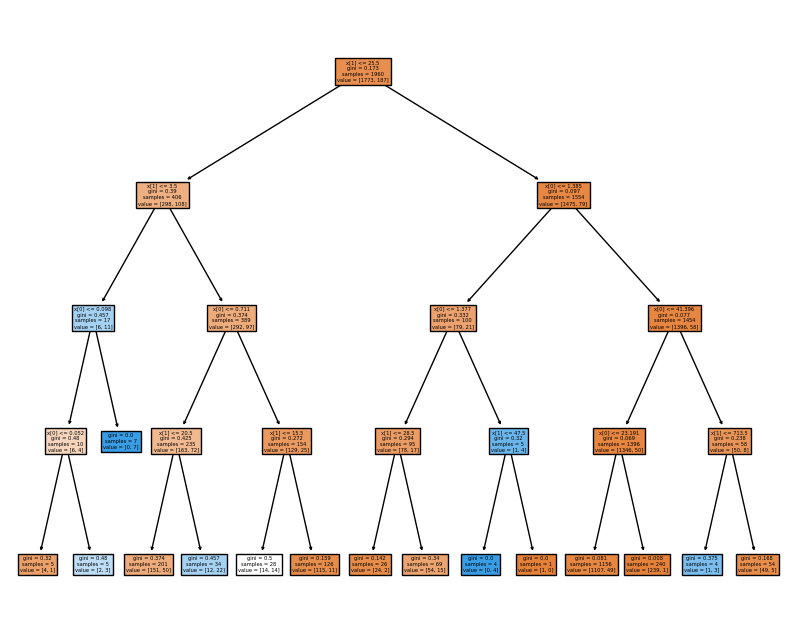

In [37]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Select features
X = df[['num_char', 'line_breaks']]

# Select target
y = df[['spam']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4400)

# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth = 4, random_state = 4400)

# Fit the decision tree model to the training data
clf.fit(X_train, y_train)

# Fit model
clf_predictions = clf.predict(X_test)

# Calculate accuracy
clf_accuracy = accuracy_score(y_test, clf_predictions)

print('Decision tree accuracy: ', clf_accuracy)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True)
plt.show()

5. Plot the decision boundary for the previous 4 models (20)

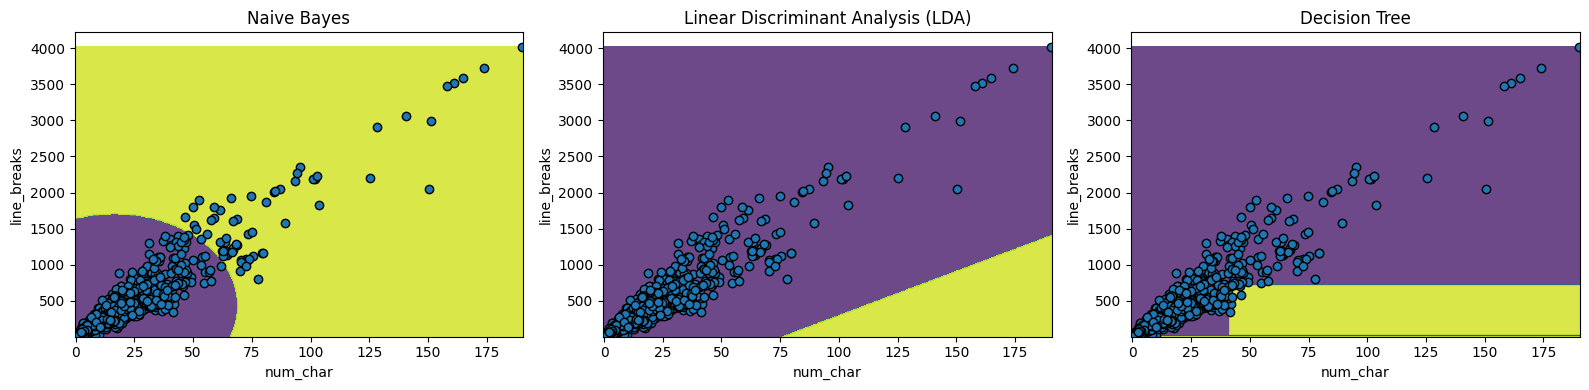

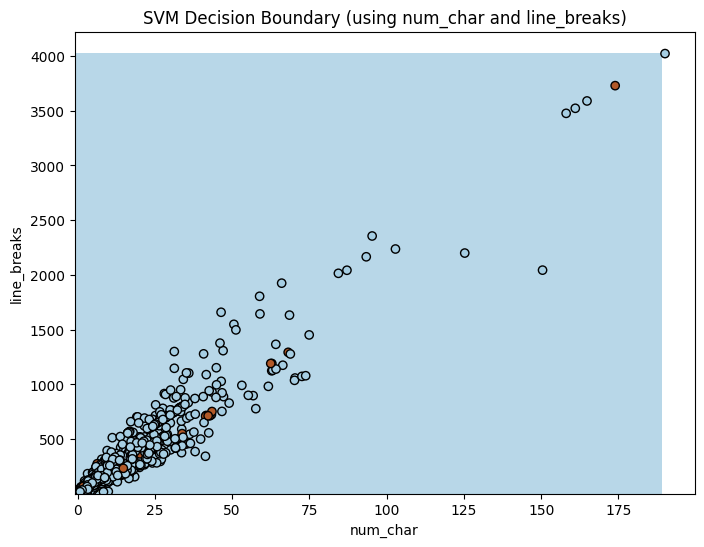

In [40]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')

# Select features
X = df[['num_char', 'line_breaks']]

# Select target
y = df[['spam']]

# Plot the decision boundaries
plt.figure(figsize=(16, 4))

# NB / LDA
# Create a meshgrid of points for NB and LDA decision boundary
x_min, x_max = X["num_char"].min() - 0.5, X["num_char"].max() + 0.5
y_min, y_max = X["line_breaks"].min() - 0.5, X["line_breaks"].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 10))

# Make predictions on the meshgrid points for each model
nb_pred = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
lda_pred = lda_model.predict(np.c_[xx.ravel(), yy.ravel()])

nb_pred = nb_pred.reshape(xx.shape)
lda_pred = lda_pred.reshape(xx.shape)

plt.subplot(1, 3, 1)
plt.contourf(xx, yy, nb_pred, alpha=0.8)
plt.scatter(X["num_char"], X["line_breaks"], edgecolors='k')
plt.xlabel('num_char')
plt.ylabel('line_breaks')
plt.title('Naive Bayes')

plt.subplot(1, 3, 2)
plt.contourf(xx, yy, lda_pred, alpha=0.8)
plt.scatter(X["num_char"], X["line_breaks"], edgecolors='k')
plt.xlabel('num_char')
plt.ylabel('line_breaks')
plt.title('Linear Discriminant Analysis (LDA)')

# Decision tree

# Create a meshgrid of points for decision tree decision boundary
x_min, x_max = X["num_char"].min() - 0.5, X["num_char"].max() + 0.5
y_min, y_max = X["line_breaks"].min() - 0.5, X["line_breaks"].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 10))

# Make predictions on the meshgrid points for each model
tree_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])

tree_pred = tree_pred.reshape(xx.shape)
lda_pred = lda_pred.reshape(xx.shape)

plt.subplot(1, 3, 3)
plt.contourf(xx, yy, tree_pred, alpha=0.8)
plt.scatter(X["num_char"], X["line_breaks"], edgecolors='k')
plt.xlabel('num_char')
plt.ylabel('line_breaks')
plt.title('Decision Tree')

plt.tight_layout()
plt.show()


# # SVM
X = X_train.to_numpy()
y = y_train.to_numpy()

# Create a meshgrid of points to make predictions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 10),
                     np.arange(y_min, y_max, 10))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions on the meshgrid
Z = best_classifier.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')
plt.xlabel('num_char')
plt.ylabel('line_breaks')
plt.title('SVM Decision Boundary (using num_char and line_breaks)')
plt.show()


6. Remove the "time" from the data. Fit all the other features to a random forest model. Tune at least 3 parameters. Plot the variable importance plot. (20)

Best Random Forest Accuracy: 0.9291177970423253
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 50}


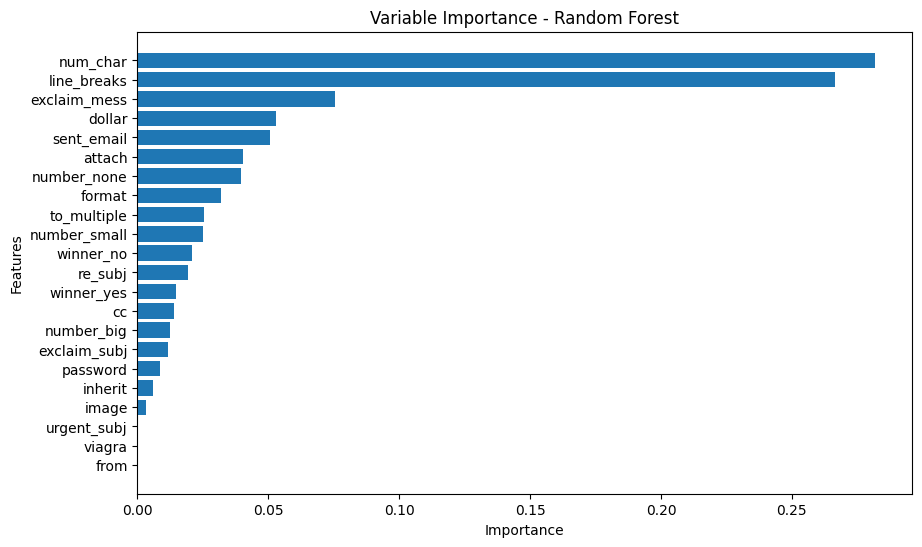

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Select features
X = df.drop(columns = ['spam', 'time'])

X = pd.get_dummies(X, columns = ['winner', 'number'])

# Select target
y = df[['spam']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                    test_size=0.5,
                                                    random_state=4400)

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=4400)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search to find the best combination of parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_valid, y_valid)

# Get the best estimator and its parameters
best_params = grid_search.best_params_

# Make predictions using the best Random Forest classifier
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# Calculate accuracy of the best Random Forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Best Random Forest Accuracy:", accuracy)
print("Best Parameters:", best_params)

# Plot the variable importance for Random Forest
importances = best_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Variable Importance - Random Forest")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [list(X.columns)[i] for i in indices])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

### Question 2: Interpret the code (10)

Read the following simulation code and figure. Explain what this code is doing and write what you have learned from the simulation.  

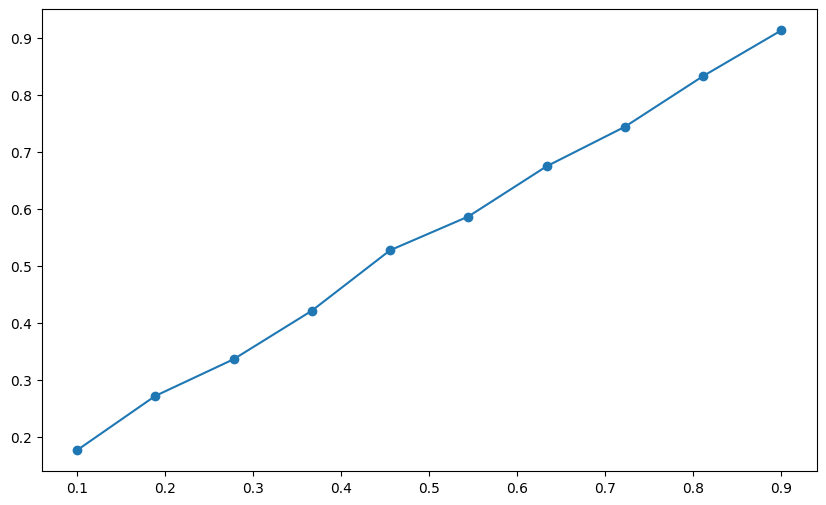

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Simulation settings
n_features = 10
sample_size = 1000
n_simulations = 10

# Initialize results arrays
correlation_levels = np.linspace(0.1, 0.9, n_simulations)
variance_explained = []

for correlation in correlation_levels:
    cov_matrix = np.eye(n_features) * (1 - correlation) + correlation
    data = np.random.multivariate_normal(mean=np.zeros(n_features), 
                                         cov=cov_matrix, size=sample_size)

    pca = PCA(n_components=1)
    pca.fit(data)

    explained_variance = pca.explained_variance_ratio_[0]
    variance_explained.append(explained_variance)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(correlation_levels, variance_explained, marker='o')
plt.show()


For each correlation in correlation levels, create a covariance matrix and generate a random multivariate normal data set 
using the specified number of features and the covariance matrix. Then, run pca analysis on the generated data and record the explained 
variance ratio data generated by the pca model in the variance_explained array.

Finally, it plots the correlation levels against the variance explained plot, which demonstrates that as correlation level increases,
the explained variance percentage increases, meaning the pca is able to explain a greater amount of variance when there is a higher correlation.